In [1]:
from typing import Dict, List, Tuple, Union
from skimage import exposure, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import pathlib
import re

def load_landsat_image(
    img_folder: Union[str, None],
    bands: Union[List[str], None]
) -> Dict:
    """
    Take a folder path and return a dict with the raw vectors extracted from the Earth Engine.
    """
    # Dictionary to save the image.
    images_dict = {}

    if img_folder:
        # Use the provided path.
        path = pathlib.Path(img_folder)
    else:
        # Get the path to retrieve.
        path = pathlib.Path(__file__).parent

    # Get the list of all files.
    files = [f.name for f in path.glob('**/*.tif')]
    # Parse all of filenames to get the unique ones.
    files = set([re.search('_[0-9](.*)[0-9]_', x).group() for x in files])
    # Dict of images to return.
    images_dict = {}

    # Iterate over the files.
    for pat in files:
        image = {}
        # Iterate over the bands.
        for band in bands:
            file = next(path.glob(f'*{pat}{band}.tif'))
            print(f'Opening file {file}')
            ds = rasterio.open(file)
            image.update({band: ds.read(1)})
        # Update the main dict.
        images_dict.update(
            {pat.replace('_','') : image}
        )

    return images_dict

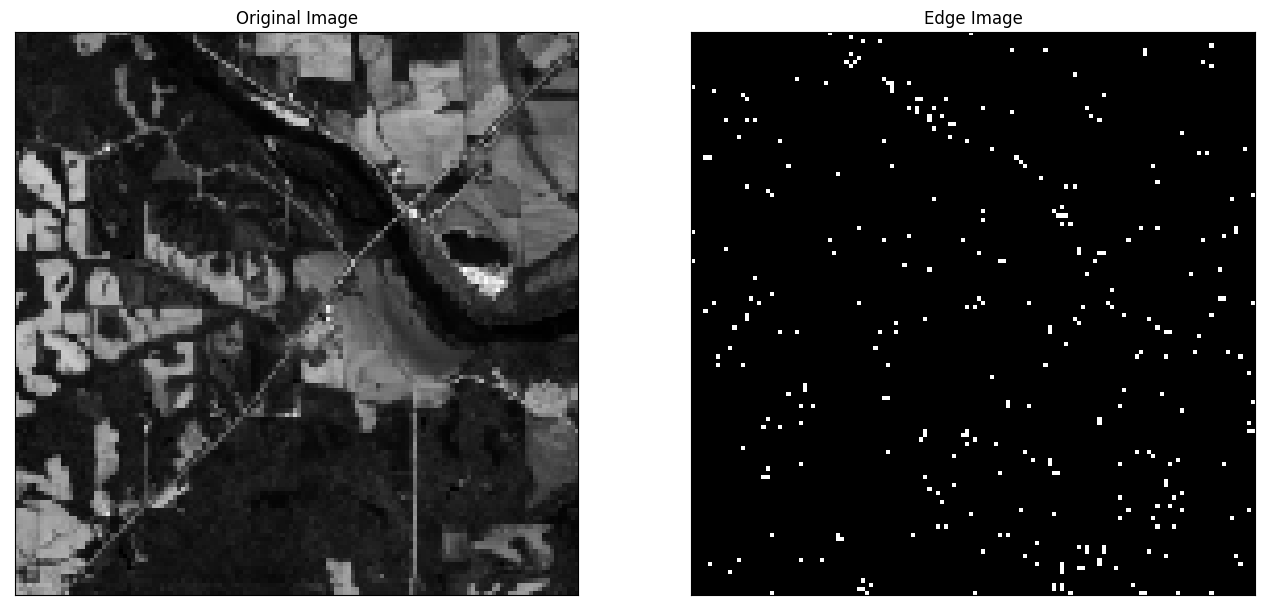

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200508T164901_20200508T165551_T15TXG_08May2020_B4.tif', flags=(cv2.IMREAD_ANYDEPTH))
img_canny = np.uint8(img)
edges = cv2.Canny(img_canny,1000,1000)

plt.figure(figsize=(16, 10))

plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
cv2.imread('/home/mauricio/code/Plant-Growth-Cycle-based-on-geospatial-data/ClimateData/S-HARMONIZED_20200615T165849_20200615T171154_T15TXG_15Jun2020_B4.tif', flags=(cv2.IMREAD_ANYDEPTH))

array([[ 357,  388,  397, ..., 1121, 1129, 1041],
       [ 349,  354,  381, ...,  803, 1047, 1041],
       [ 341,  366,  381, ...,  664,  727,  742],
       ...,
       [2154, 1910, 1823, ...,  406,  427,  501],
       [1528, 1463, 1386, ...,  418,  426,  501],
       [1291, 1684, 1775, ...,  416,  433,  458]], dtype=int32)

In [ ]:
edges

array([[  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0, 255,   0]], dtype=uint8)

In [ ]:
edges[0]

array([  0,   0,   0, ..., 255,   0,   0], dtype=uint8)